# 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come across for classification models are:

- 1. Accuracy
- 2. Area under ROC curve (receiver operating characteristic curve)
- 3. Confusion matrix
- 4. Classification report

In [1]:
# Basic import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [4]:
np.mean(cross_val_score)

0.8248087431693989

In [5]:
print(f"Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validation Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1

In [6]:
# create x_test...etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.metrics import roc_curve

# Fit the Classifier
clf.fit(X_train, y_train)

# Make prediction with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [8]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [9]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

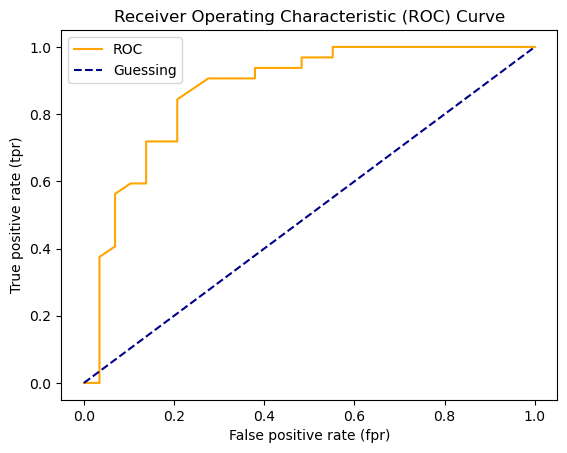

In [10]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

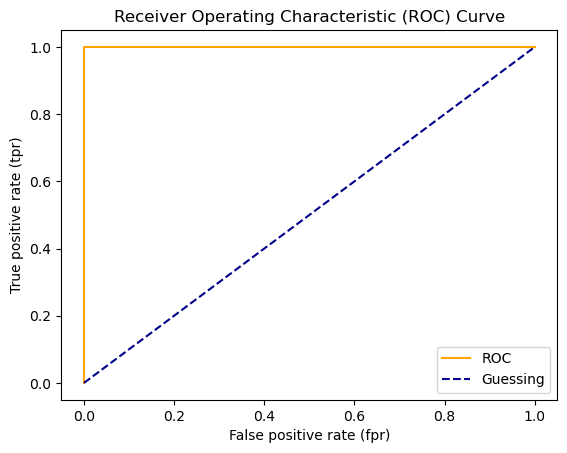

In [12]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [13]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 
In essence, giving you an idea of where the model is getting confused.

In [14]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [15]:
# Visualizing Confusion Matrix with pd.crosstab()

pd.crosstab(y_test, 
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labes'])

Predicted Labes,0,1
Actual Labels,,
0,23,6
1,6,26


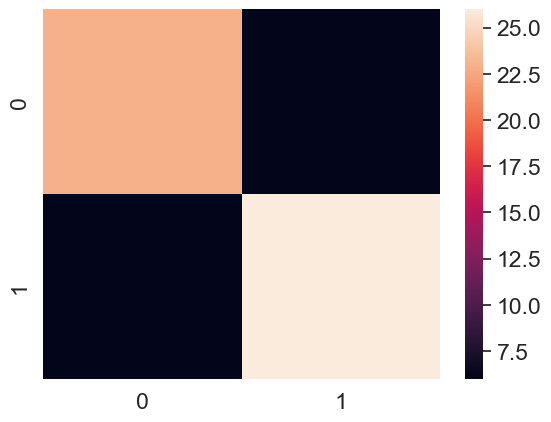

In [16]:
# Make confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

In [17]:
clf

RandomForestClassifier()

Note: Always use Uppercase 'X' for sklearn not lowercase 'x'

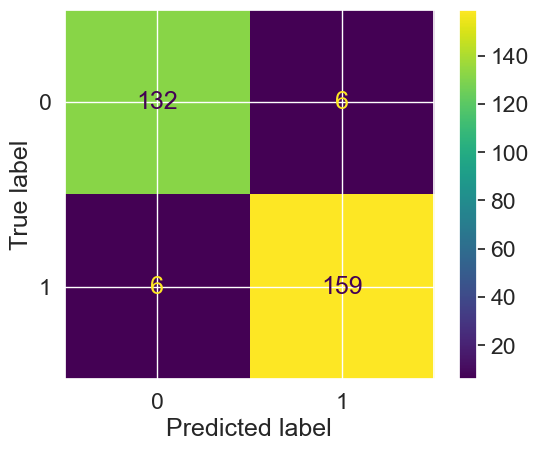

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

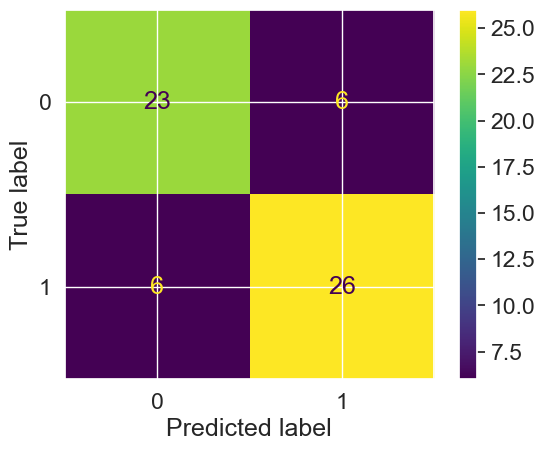

In [19]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Regression Model Evaluation Metrics

### R^2 (Coefficient of Determination)

R^2, pronounced as "r-squared", is a metric that evaluates how well your regression model performs compared to a simple mean-predictor. It ranges from negative infinity (indicating a very poor model) to 1. 

- **Interpretation**: 
  - R^2 = 0: The model predicts the mean of the target values, indicating it does not explain any variability in the target.
  - R^2 = 1: The model perfectly predicts the target values.
  - R^2 < 0: The model performs worse than predicting the mean, suggesting it might be overfitting.

### Mean Absolute Error (MAE)

MAE measures the average magnitude of errors in a set of predictions, without considering their direction.

### Mean Squared Error (MSE)

MSE measures the average squared difference between the predicted values and the actual values.

For more details on these metrics, refer to the [Scikit-learn documentation on regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).


In [21]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing;

In [22]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
model.score(X_train, y_train)


0.973652044608591

In [25]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [27]:
y_test.mean()

2.0550030959302323

In [28]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [29]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [30]:

r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [31]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

***Mean Absolute Error (MAE)**

- A model's mean absolute error can be calculated with Scikit-Learn's `sklearn.metrics.mean_absolute_error` method.

In [32]:
# Mean Absolute Error 

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mea = mean_absolute_error(y_test, y_preds)
mea

0.3270458119670544

In [33]:
# This means, on average our models predictions are 0.327 units away from the actual value.

df = pd.DataFrame(data={'Actual Values': y_test,
                        'Predictions': y_preds})

df['differences'] = df["Predictions"] - df['Actual Values']
df.head()

,Actual Values,Predictions,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390


In [34]:
# MAE formula and differences
np.abs(df['differences']).mean()

0.3270458119670544

***Mean Squared Error***

- MSE is the mean of the square of the errors between actual and predicted values.

In [35]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [36]:
df['squared_differences'] = np.square(df['differences'])
df.head()

,Actual Values,Predictions,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [37]:
# Calculate Mean

squared = np.square(df["differences"])
squared.mean()

0.2542443610174998

In [38]:
df_large_error = df.copy()
df_large_error.loc[df_large_error.index[0], "squared_differences"] = 16


In [39]:
df_large_error.head()

,Actual Values,Predictions,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [40]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25812028533523235

In [41]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error.head()

,Actual Values,Predictions,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.0
3024,0.45800,0.759890,0.301890,20.0
15663,5.00001,4.935016,-0.064994,20.0
20484,2.18600,2.558640,0.372640,20.0
9814,2.78000,2.334610,-0.445390,20.0


In [42]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7342642968470183

## 4.2.3 Evaluating a model using the scoring parameter

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [44]:
# We'll use default which is accuracy

np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [48]:
# Cross-validated accuracy

print(f"The Cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The Cross-validated accuracy is: 82.48%


In [49]:
# Using 'accuracy'

np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [50]:
print(f"The Cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The Cross-validated accuracy is: 82.48%


In [52]:
# Precision 

np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [53]:
print(f"The Cross-validate accuracy is: {np.mean(cv_precision)}")

The Cross-validate accuracy is: 0.8329547346025924


In [54]:
# Recall

np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [58]:
print(f"The Cross-validate accuracy is: {np.mean(cv_recall)}")

The Cross-validate accuracy is: 0.8545454545454545



**Scoring parameters on regression problems**

In [56]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [57]:
# r2 - Default

np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6538469004539024

In [62]:
# MAE (Mean Asolute Error)


cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4668882098013567

In [63]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46540761555717064

In [64]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.45683709585358284

## 4.3 Using different evaluation metrics as Scikit-Learn functions
The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make prediction
y_preds = clf.predict(X_test)

# Evaluation of metrics functions
print("Classification Metrics on test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1 Score: {f1_score(y_test, y_preds)}")

Classification Metrics on test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384616


### Now on Regression

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evalutation of model 
print("Regression Metrics on test sets")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression Metrics on test sets
R2 score: 0.8059809073051385
MAE: 0.3270458119670544
MSE: 0.2542443610174998
